<IPython.core.display.Javascript object>


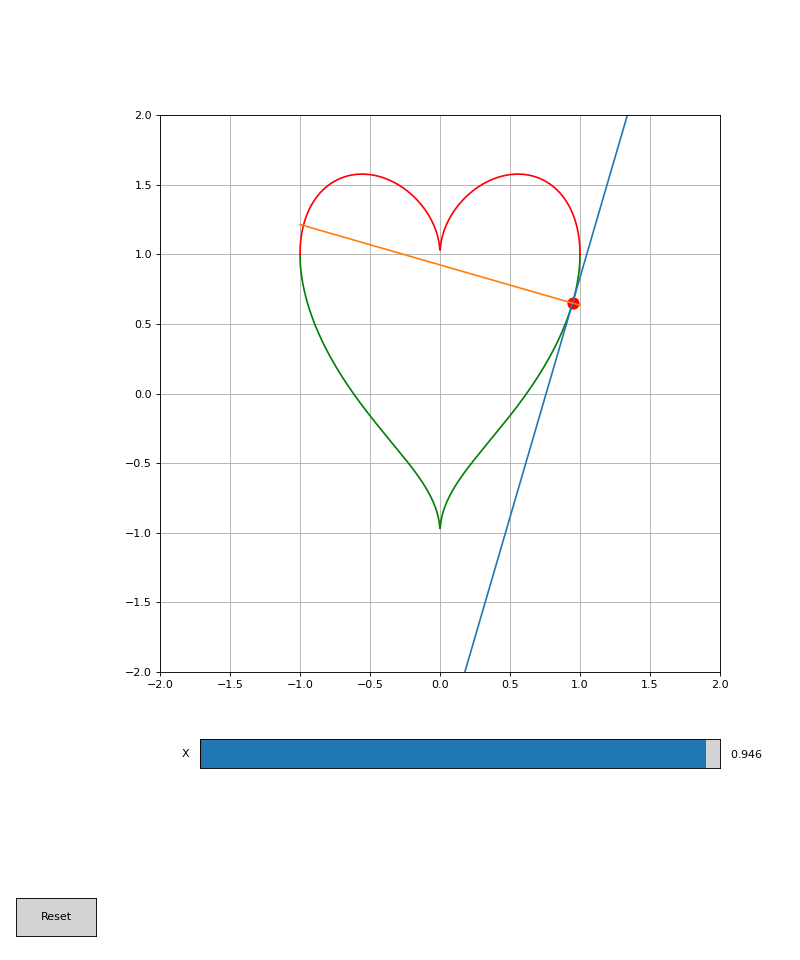

Button(description='top', style=ButtonStyle())

Output()

Button(description='bot', style=ButtonStyle())

Output()

In [1]:
from IPython.display import display
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons
%matplotlib notebook

fig, ax = plt.subplots(figsize=(10, 12), dpi=100)
plt.subplots_adjust(left=0.2, bottom=0.3)

def get_func_value_bot(x):
    result = np.sqrt(np.abs(x))-np.sqrt(1-x*x)
    return result

def get_func_value_top(x):
    result = np.sqrt(np.abs(x))+np.sqrt(1-x*x)
    return result


x = np.linspace(-1, 1,1000)
line_bot, = plt.plot(x, get_func_value_bot(x), color='red')
line_top, = plt.plot(x, get_func_value_top(x), color='red')


t = np.linspace(-2, 2, 1000)
x0 = -1
y0 = get_func_value_bot(x0)
point, = plt.plot(x0,y0,'ro', markersize=10)

delta = 0.0001
k=(get_func_value_bot(x0+delta)-get_func_value_bot(x0))/((x0+delta)-x0)
b=get_func_value_bot(x0+delta)-(get_func_value_bot(x0+delta)-get_func_value_bot(x0))/((x0+delta)-x0)*(x0+delta)

xk=t
yk=k*t+b
tangent, = plt.plot(xk,yk)

t1 = np.linspace(-1, 1, 1000)
xn=t1
yn=get_func_value_bot(x0)-(1/k)*(t1-x0)
normal, = plt.plot(xn,yn)


plt.axis([-2, 2, -2, 2])
ax.grid(axis = 'both')
axcolor = 'lightgray'
axt1 = plt.axes([0.25, 0.2, 0.65, 0.03], facecolor=axcolor)
st1 = Slider(axt1, 'X', -1, 1, valinit=x0)



reset_ax = plt.axes([0.02, 0.025, 0.1, 0.04])
reset_button = Button(reset_ax, 'Reset', color=axcolor, hovercolor='0.975')
def reset(event):
    st1.reset()
reset_button.on_clicked(reset)


def update_top(val):
    x0 = st1.val
    point.set_data(x0, get_func_value_top(x0))
    k=(get_func_value_top(x0+delta)-get_func_value_top(x0))/((x0+delta)-x0)
    b=get_func_value_top(x0+delta)-(get_func_value_top(x0+delta)-get_func_value_top(x0))/((x0+delta)-x0)*(x0+delta)
    yk = k*t+b
    tangent.set_ydata(yk)
    yn = get_func_value_top(x0)-(1/k)*(t1-x0)
    normal.set_ydata(yn)
    fig.canvas.draw_idle()

def update_bot(val):
    x0 = st1.val
    point.set_data(x0, get_func_value_bot(x0))
    k=(get_func_value_bot(x0+delta)-get_func_value_bot(x0))/((x0+delta)-x0)
    b=get_func_value_bot(x0+delta)-(get_func_value_bot(x0+delta)-get_func_value_bot(x0))/((x0+delta)-x0)*(x0+delta)
    yk = k*t+b
    tangent.set_ydata(yk)
    yn = get_func_value_bot(x0)-(1/k)*(t1-x0)
    normal.set_ydata(yn)
    fig.canvas.draw_idle()
    

button_top = widgets.Button(description="top")
output_top = widgets.Output()
display(button_top, output_top)
def on_button_clicked_top(b):
    with output_top:
        line_bot.set_color('red')
        line_top.set_color('green')
        fig.canvas.draw_idle()
    st1.on_changed(update_top)
button_top.on_click(on_button_clicked_top)


button_bot = widgets.Button(description="bot")
output_bot = widgets.Output()
display(button_bot, output_bot)
def on_button_clicked_bot(b):
    with output_bot:
        line_bot.set_color('green')
        line_top.set_color('red')
        fig.canvas.draw_idle()
    st1.on_changed(update_bot)
button_bot.on_click(on_button_clicked_bot)


plt.show()